<a href="https://colab.research.google.com/github/FirmanAhmadBayumi/Machine-Learning/blob/main/PERTEMUAN4_FirmanAhmadBayumi_2117051062.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 4

##Library


In [1]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.cluster import KMeans as KM
from yellowbrick.cluster import KElbowVisualizer as KEV

## Dataset

In [ ]:
# membuat data tabular
df = pd.DataFrame(
    {
        "ID Buah" : pd.Series([1, 2, 3, 4, 5]),
        "Diameter" : pd.Series([7.0, 7.1, 6.5, 6.6, 6.8]),
        "Berat": pd.Series([165, 170, 180, 195, 200])
    }
)

df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


## Algoritma K-Means

In [ ]:
# pemilihan feature

df_train = df.drop("ID Buah", axis = 1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [ ]:
# fitting / predict / labeling berdasarkan jumlah kluster (n=2)

n = 2
kmeans_model = KM(n_clusters=n, n_init=1, random_state=100).fit(df_train)

In [ ]:
# pelabelan cluster

df["kluster"] = kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [ ]:
# hasil dari update centorid

print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


### Tantangan Algoritma K-Means
Limitasi atau tantangan dari algoritma ini adalah menentukan nilai centroid diawal dan jumlah kluster yang manual, sehingga perlu ada mekanisme/metode tertentu untuk memilih centroid diawal dan jumlah kluster

#### Pemilihan centroid awal
*   Menggunakan aturan parameter yang ada di sklearn
*   lbh lengkap ada di dokumentasi https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# n_cluster merupakan parameter dari jumlah cludter/kelompok yg hrs ditentukan
# nilai n_cluster tergantung data, atau bisa berdasarkan metode elbow, dll, defaultnya 8 atau ketika tidak diisi jumlah cluster=8
# n_init merupakan parameter untuk menentukan berapa kali algoritma k-meeans dijalankan dengan centroid seed yang berbeda
# nilai n_init bisa 1 atau lebih dari 1 ,defaultnya 10/ato
# random_state merupakan parameter untuk menetukan angka acak sebagai inisialisasi centroid
# nilai random_state dengan nilai deterministik (0-100), defaultnya none

# atur parameter untuk kmeans_model_2 ini sehingga berbeda dengann parameter jmeans_model sebelumnya

kmeans_model_2 = KM(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


#### Pemilihan jumlah kluster


*   Menggunakan metode elbow
*   Library bisa apa saja, disini cotohnya menggunakan scikit yellowbrick cluster https://www.scikit-yb.org/en/latest/api/cluster/elbow.html



In [ ]:
# standarnisasi terlebih dajili dalam bentuk array

x_array = np.array(df_train)
scaler = MMS()
x_scaled = scaler.fit_transform(x_array)

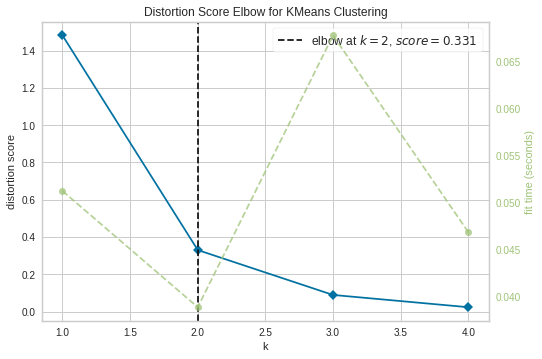

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KM(n_init=1, random_state=100)
visualizer = KEV(km, k=(1,5), timing=True)
visualizer.fit(x_scaled)
visualizer.show()

## Tugas

* Gunakan data dari url ini https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv
* Hasil bisa berbeda tergantung pengolahan data, pemilihan nilai centroid diawal dan jumlah kluster
* Yang menjadi penilaian adalah proses coding dari mulai pengambilan data, pengolahan data, hingga penerapan algoritma k-means


In [17]:
# menyimpan link url yang diberikan ke dalam variabel url serta membaca data menggunakan library pandas dan mencetak data
url = "https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv"
data_url = pd.read_csv(url)
data_url

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
...,...,...,...,...,...,...,...,...
367,2022041468,91,NaN,31.0,52.0,31.0,46,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


In [18]:
# pada syntax dibawah digunakan untuk menghapus nilai/data yang sifatnya NaN (Not a Number)
data_url.dropna(inplace = True)
data_url

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
5,2022041106,85,95.0,34.0,73.0,57.0,98,not pass
6,2022041107,95,79.0,52.0,54.0,85.0,13,not pass
...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


Dapat dilihat dari output data yang telah dicetak diatas yaitu jumlah rows menjadi 312 yang sebelumnya berjumlah 372 rows saat data dioutputkan pertama kali. ini artinya dengan menggunakan syntax (data_url.dropna(inplace = True)) kita sudah menghapus data/nilai yang sifatnya NaN (Not a Number)

In [19]:
# menentukan jumlah cluster
jmlh_clusters = 4

# menentukan centroid diawal
centroids = [[94,78,92,30,94,59], [89,89,73,55,80,19], [95,90,86,76,30,73], [100,93,98,12,81,44]]

Pada kode dibawah ini pada kolom pass_test terdapat nilai string yaitu "not pass" dan "pass, hal ini menyebabkan error pada program. Sehingga kita harus menghapus baris yang memiliki nilai string "not pass" dan "pass" dan menggantinya ke nilai numerik yang semulanya "not pass" menjadi 0 dan "pass" menjadi 1

In [21]:
# algoritma K-Means
kmeans = KM(jmlh_clusters)

data_url['pass_test'] = data_url['pass_test'].replace('not pass', 0)
data_url['pass_test'] = data_url['pass_test'].replace('pass', 1)

# mengkonversi nilai pada kolom pass_test ke tipe data float 
data_url['pass_test'] = data_url['pass_test'].astype(float)

In [22]:
# melakukan clustering pada data
df = pd.DataFrame(data_url)
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [24]:
# menampilkan hasil clustering
df ["clusters"] = kmeans.labels_
df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,clusters
0,2022041101,99,71.0,93.0,52.0,44.0,24,0.0,0
2,2022041103,86,71.0,84.0,17.0,21.0,41,0.0,0
4,2022041105,93,85.0,68.0,29.0,44.0,50,0.0,0
5,2022041106,85,95.0,34.0,73.0,57.0,98,0.0,0
6,2022041107,95,79.0,52.0,54.0,85.0,13,0.0,0
...,...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,0.0,3
368,2022041469,96,87.0,55.0,56.0,95.0,11,1.0,3
369,2022041470,569,83.0,89.0,15.0,86.0,13,0.0,3
370,2022041471,84,92.0,87.0,97.0,42.0,27,1.0,3
